In [6]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff


# nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# important libraries
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from collections import Counter
import spacy
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import os

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df = pd.read_csv('combined_clean.csv', dtype={'column1': str, 'column2': float, 'column3': int}, low_memory=False)

In [10]:
df.shape

(15752, 105)

In [11]:
df.columns

Index(['avatar', 'fullname', 'id', 'images/0', 'images/1', 'images/2',
       'images/3', 'isQuote', 'isRetweet', 'likes',
       ...
       'quotedTweet/links/21', 'quotedTweet/links/22', 'quotedTweet/links/23',
       'quotedTweet/links/24', 'quotedTweet/links/25', 'quotedTweet/links/26',
       'quotedTweet/links/27', 'quotedTweet/links/28', 'quotedTweet/links/29',
       'images/6'],
      dtype='object', length=105)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Columns: 105 entries, avatar to images/6
dtypes: bool(4), float64(1), int64(9), object(91)
memory usage: 12.2+ MB


In [13]:
df.isna().sum().sort_values(ascending=False)

quotedTweet/avatar      15752
images/6                15751
quotedTweet/links/27    15751
links/29                15751
images/5                15751
                        ...  
url                         0
user/url                    0
user/totalTweets            0
user/totalLikes             0
verified                    0
Length: 105, dtype: int64

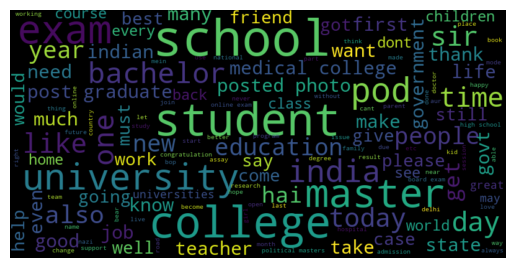

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

# Assuming 'your_dataframe' is your DataFrame with a column named 'text'
stopwords_set = set(stopwords.words('english'))

# Concatenate all the text in the 'text' column
all_text = ' '.join(df['text'].astype(str))

# Create WordCloud
wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords_set,
    max_words=300,
    max_font_size=40,
    scale=2,
    random_state=42
).generate(all_text)

# Display the WordCloud
print(wordcloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
